# Project name : Simulating a call center by using Machine learning

Contributer: Rajeev singh sisodiya

Project details: Simulating a call center using Python can be a useful way to experiment with different call center scenarios, test staffing levels, and analyze performance. In this simulation, we use the SimPy library to create a discrete event simulation of a call center. We define parameters such as the number of agents, call intervals, service time, and simulation time.

Agents wait for calls and handle them. Calls are generated at random intervals and placed in a call queue. The agents pick up calls from the queue and handle them with a random service time following an exponential distribution.

This is a simplified example, and you can make it more complex by adding features like agent availability, different call types, and performance metrics. Additionally, you can use the data generated by the simulation to analyze call center performance and make informed decisions about staffing and resource allocation.

In [131]:
!pip3 install simpy

In [132]:
import random

In [133]:
import simpy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts


In [134]:
ccd = pd.read_csv('/content/Call Center Data.csv')
ccd.head()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%


In [135]:
ccd.tail()

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
1246,1247,191,184,96.34%,7,0:00:07,0:02:50,0:01:56,92.55%
1247,1248,212,209,98.58%,3,0:00:10,0:02:51,0:01:45,89.10%
1248,1249,210,203,96.67%,7,0:00:12,0:03:22,0:03:52,85.24%
1249,1250,167,159,95.21%,8,0:00:16,0:03:16,0:02:42,83.03%
1250,1251,12,11,91.67%,1,0:00:03,0:02:12,0:00:58,91.67%


In [136]:
ccd.dtypes

Index                          int64
Incoming Calls                 int64
Answered Calls                 int64
Answer Rate                   object
Abandoned Calls                int64
Answer Speed (AVG)            object
Talk Duration (AVG)           object
Waiting Time (AVG)            object
Service Level (20 Seconds)    object
dtype: object

In [137]:
ccd.describe

<bound method NDFrame.describe of       Index  Incoming Calls  Answered Calls Answer Rate  Abandoned Calls  \
0         1             217             204      94.01%               13   
1         2             200             182      91.00%               18   
2         3             216             198      91.67%               18   
3         4             155             145      93.55%               10   
4         5              37              37     100.00%                0   
...     ...             ...             ...         ...              ...   
1246   1247             191             184      96.34%                7   
1247   1248             212             209      98.58%                3   
1248   1249             210             203      96.67%                7   
1249   1250             167             159      95.21%                8   
1250   1251              12              11      91.67%                1   

     Answer Speed (AVG) Talk Duration (AVG) Waiting T

In [138]:
# Define the parameters
num_agents = 1250
call_interval = 1  # Average time between calls (in minutes)
service_time = 3  # Average call handling time (in minutes)
simulation_time = 1  # Total simulation time (in minutes)


In [139]:
# Create a call center environment
env = simpy.Environment()

In [140]:
# Agent process
def agent(env, name):
    while True:
        print(f'{name} is waiting for a call at {env.now} minutes.')
        yield env.timeout(1)  # Agent checks for a call every minute

        if call_queue.items:
            call = call_queue.get()
            print(f'{name} is answering a call at {env.now} minutes.')
            yield env.timeout(random.expovariate(1 / service_time))
            print(f'{name} has completed a call at {env.now} minutes.')


In [141]:
# Call process
def call_generator(env, num_calls):
    for i in range(num_calls):
        yield env.timeout(random.expovariate(1 / call_interval))
        call_queue.put(i)


In [142]:
# Create a call queue
call_queue = simpy.Store(env)

In [143]:
# Create call agents
for i in range(num_agents):
    env.process(agent(env, f'Agent {i}'))

In [144]:
# Start call generation
env.process(call_generator(env, simulation_time // call_interval))


<Process(call_generator) object at 0x7ecf4e2f5e70>

In [145]:
# Run the simulation
env.run(until=simulation_time)

Agent 0 is waiting for a call at 0 minutes.
Agent 1 is waiting for a call at 0 minutes.
Agent 2 is waiting for a call at 0 minutes.
Agent 3 is waiting for a call at 0 minutes.
Agent 4 is waiting for a call at 0 minutes.
Agent 5 is waiting for a call at 0 minutes.
Agent 6 is waiting for a call at 0 minutes.
Agent 7 is waiting for a call at 0 minutes.
Agent 8 is waiting for a call at 0 minutes.
Agent 9 is waiting for a call at 0 minutes.
Agent 10 is waiting for a call at 0 minutes.
Agent 11 is waiting for a call at 0 minutes.
Agent 12 is waiting for a call at 0 minutes.
Agent 13 is waiting for a call at 0 minutes.
Agent 14 is waiting for a call at 0 minutes.
Agent 15 is waiting for a call at 0 minutes.
Agent 16 is waiting for a call at 0 minutes.
Agent 17 is waiting for a call at 0 minutes.
Agent 18 is waiting for a call at 0 minutes.
Agent 19 is waiting for a call at 0 minutes.
Agent 20 is waiting for a call at 0 minutes.
Agent 21 is waiting for a call at 0 minutes.
Agent 22 is waiting 

In [146]:
ccd

,Index,Incoming Calls,Answered Calls,Answer Rate,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG),Service Level (20 Seconds)
0,1,217,204,94.01%,13,0:00:17,0:02:14,0:02:45,76.28%
1,2,200,182,91.00%,18,0:00:20,0:02:22,0:06:55,72.73%
2,3,216,198,91.67%,18,0:00:18,0:02:38,0:03:50,74.30%
3,4,155,145,93.55%,10,0:00:15,0:02:29,0:03:12,79.61%
4,5,37,37,100.00%,0,0:00:03,0:02:06,0:00:35,97.30%
...,...,...,...,...,...,...,...,...,...
1246,1247,191,184,96.34%,7,0:00:07,0:02:50,0:01:56,92.55%
1247,1248,212,209,98.58%,3,0:00:10,0:02:51,0:01:45,89.10%
1248,1249,210,203,96.67%,7,0:00:12,0:03:22,0:03:52,85.24%
1249,1250,167,159,95.21%,8,0:00:16,0:03:16,0:02:42,83.03%


In [147]:
# Data Cleaning/Conversion

ccd_time = ccd

# Convertine to datetime values
ccd_time['Answer Speed (AVG)'] = pd.to_datetime(ccd_time['Answer Speed (AVG)'])
ccd_time['Talk Duration (AVG)'] = pd.to_datetime(ccd_time['Talk Duration (AVG)'])
ccd_time['Waiting Time (AVG)'] = pd.to_datetime(ccd_time['Waiting Time (AVG)'])

#Converting datetime values into decimals for the hours, minutes, and seconds in order to have useable statistical (float) data
ccd_time['Answer Speed (AVG)'] =  ccd_time['Answer Speed (AVG)'].dt.hour * 60 + ccd_time['Answer Speed (AVG)'].dt.minute + ccd_time['Answer Speed (AVG)'].dt.second/60
ccd_time['Talk Duration (AVG)'] = ccd_time['Talk Duration (AVG)'].dt.hour * 60 + ccd_time['Talk Duration (AVG)'].dt.minute + ccd_time['Talk Duration (AVG)'].dt.second/60
ccd_time['Waiting Time (AVG)'] = ccd_time['Waiting Time (AVG)'].dt.hour * 60 + ccd_time['Waiting Time (AVG)'].dt.minute + ccd_time['Waiting Time (AVG)'].dt.second/60



In [148]:
# Verifying changes have worked in our transition
ccd_time.dtypes

Index                           int64
Incoming Calls                  int64
Answered Calls                  int64
Answer Rate                    object
Abandoned Calls                 int64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)     object
dtype: object

To complete the cleaning of the data, the '%' sign needs to be remove from both the Answer Rate and Service Level (20 Seconds) fields. This is preventing the conversion of these fields from object (above) to a float (below).



In [149]:
# Changing percentage columns -- Answer Rate and Service Level (20 Seconds) to a float type
ccd_time['Answer Rate'] = ccd_time['Answer Rate'].str.replace('%','')
ccd_time['Answer Rate'] = ccd_time['Answer Rate'].astype(float)

ccd_time['Service Level (20 Seconds)'] = ccd_time['Service Level (20 Seconds)'].str.replace('%','')
ccd_time['Service Level (20 Seconds)'] = ccd_time['Service Level (20 Seconds)'].astype(float)

# Validating all changes complete
ccd_time.dtypes

Index                           int64
Incoming Calls                  int64
Answered Calls                  int64
Answer Rate                   float64
Abandoned Calls                 int64
Answer Speed (AVG)            float64
Talk Duration (AVG)           float64
Waiting Time (AVG)            float64
Service Level (20 Seconds)    float64
dtype: object

In [150]:
# Now that the data has been cleaned, I'll look for null values in the dataset.
ccd_time.isnull().sum()




Index                         0
Incoming Calls                0
Answered Calls                0
Answer Rate                   0
Abandoned Calls               0
Answer Speed (AVG)            0
Talk Duration (AVG)           0
Waiting Time (AVG)            0
Service Level (20 Seconds)    0
dtype: int64

Since there are no null/nan values within the dataset, visualization of the data below starts with a high-level view of the various fields as a histogram. This is helpful to determine where incoming call volume is going, and how the various fields are grouped (in terms of aggregate volume).



array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Incoming Calls'}>,
        <Axes: title={'center': 'Answered Calls'}>],
       [<Axes: title={'center': 'Answer Rate'}>,
        <Axes: title={'center': 'Abandoned Calls'}>,
        <Axes: title={'center': 'Answer Speed (AVG)'}>],
       [<Axes: title={'center': 'Talk Duration (AVG)'}>,
        <Axes: title={'center': 'Waiting Time (AVG)'}>,
        <Axes: title={'center': 'Service Level (20 Seconds)'}>]],
      dtype=object)

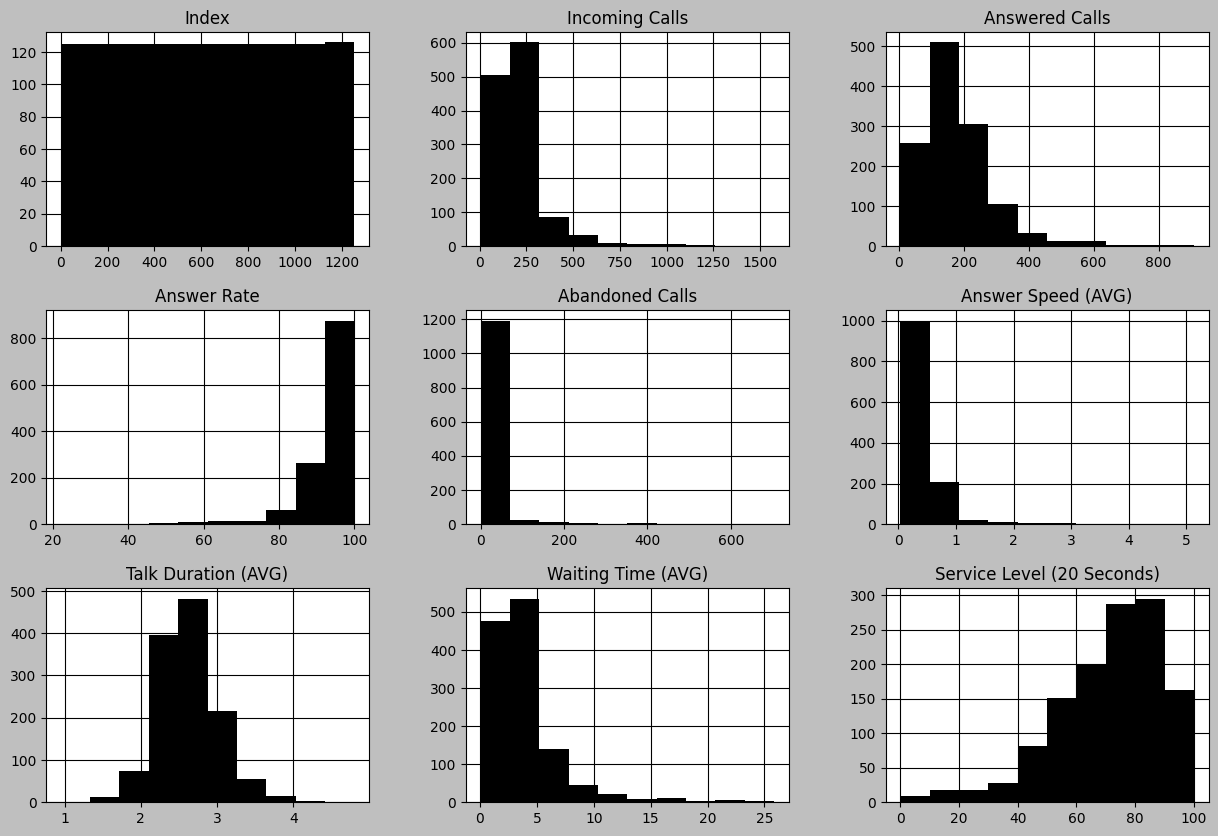

In [151]:
plt.style.use('grayscale')
ccd_time.hist(figsize=(15,10))


Beyond the above, since the nulls and incorrect formatting has been corrected, I can now run a heatmap/correlogram using to determine more meaningful relationships between the various data fields.



<Axes: >

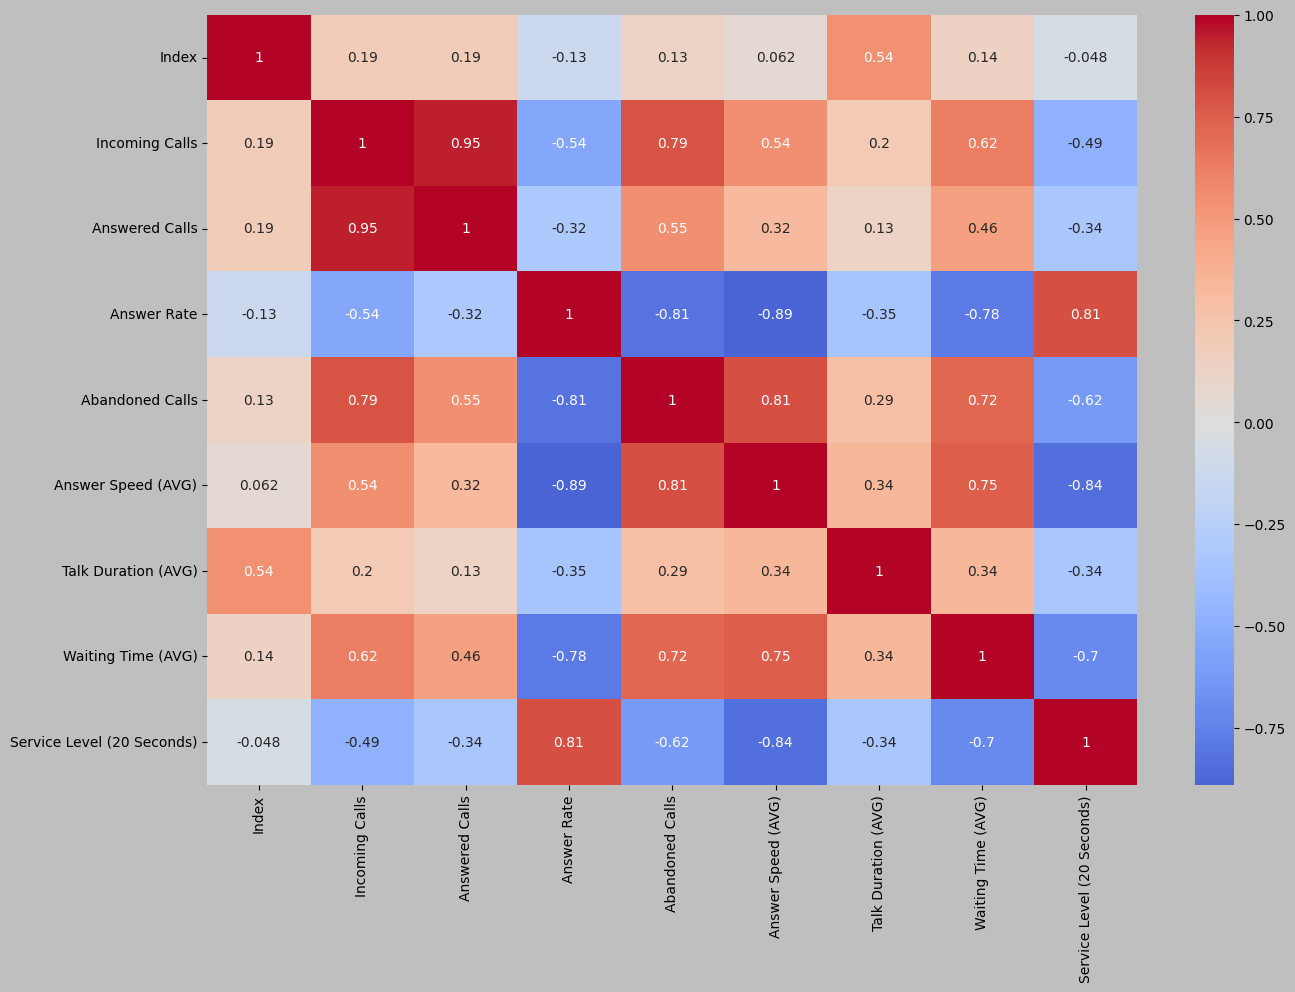

In [152]:
plt.figure(figsize=(15,10))
sns.color_palette("dark", as_cmap=True)
sns.heatmap(ccd_time.corr(), annot=True, cmap='coolwarm', center = 0)


The below helps to clearly indicate that wait time, rather than call volume, is a key driver in abandonment in calls. While there is a relationship between these fields generally, overall, if there are a lot of calls answered quickly, there is less of an impact on abandonment. Additionally, there is a significant increase in abandonment when wait time exceeds 15 minutes and call volume exceeds 800 calls.



Text(0.5, 1.0, 'Incoming Calls and Abandonment')

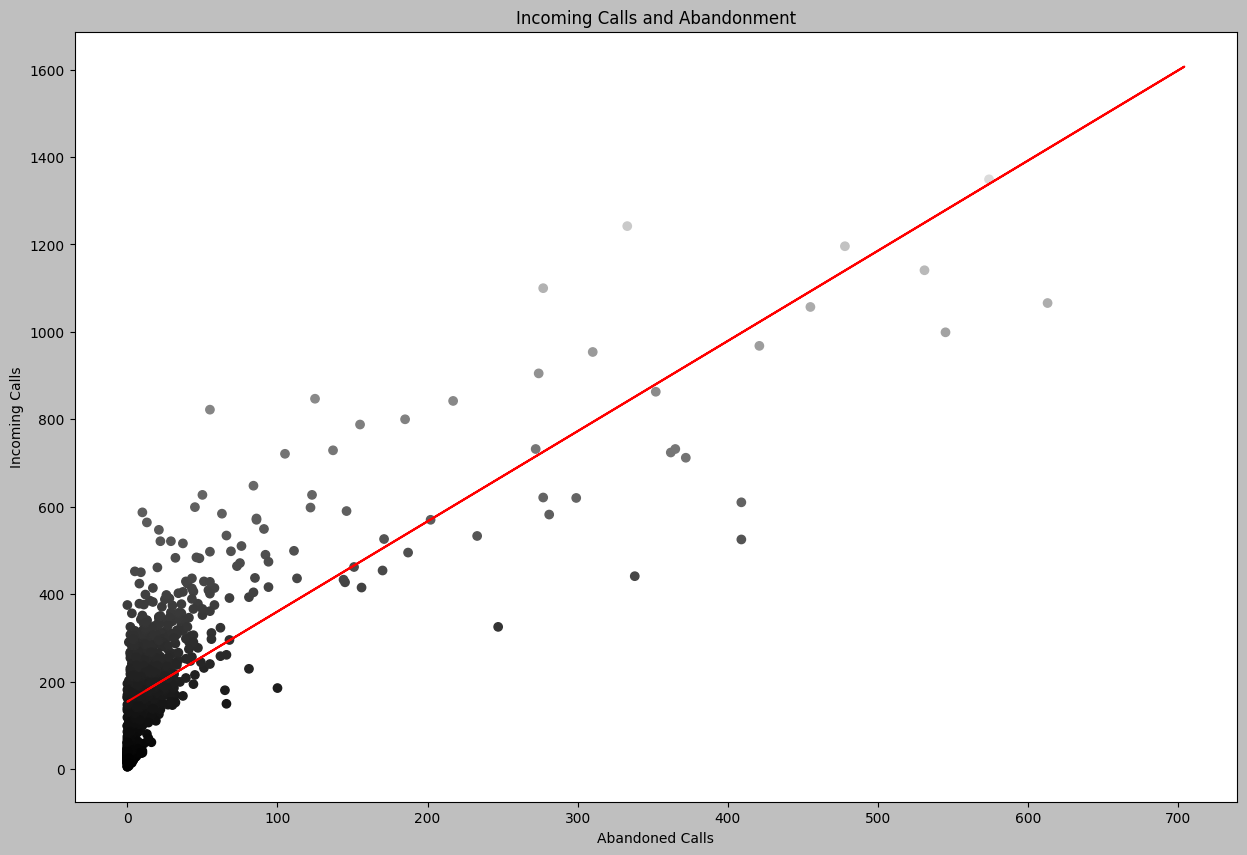

In [153]:
#Linear Regression - Incoming Calls and Abandonment
x = np.array(ccd_time['Abandoned Calls']).reshape(-1,1)
y = np.array(ccd_time['Incoming Calls'])



mod = lr()
mod.fit(x,y)

mod = lr().fit(x,y)
r_sq = mod.score(x,y)

#print(r_sq)
#print(mod.intercept_)

y_pred = mod.predict(x)
#print(y_pred)

plt.figure(figsize=(15,10))
plt.scatter(x, y,c=y)
plt.plot(x, y_pred,c="red")
plt.xlabel('Abandoned Calls')
plt.ylabel('Incoming Calls')
plt.title('Incoming Calls and Abandonment')


[109.99]
1.0


Text(0.5, 1.0, 'Actual vs. Predicted Abandonment')

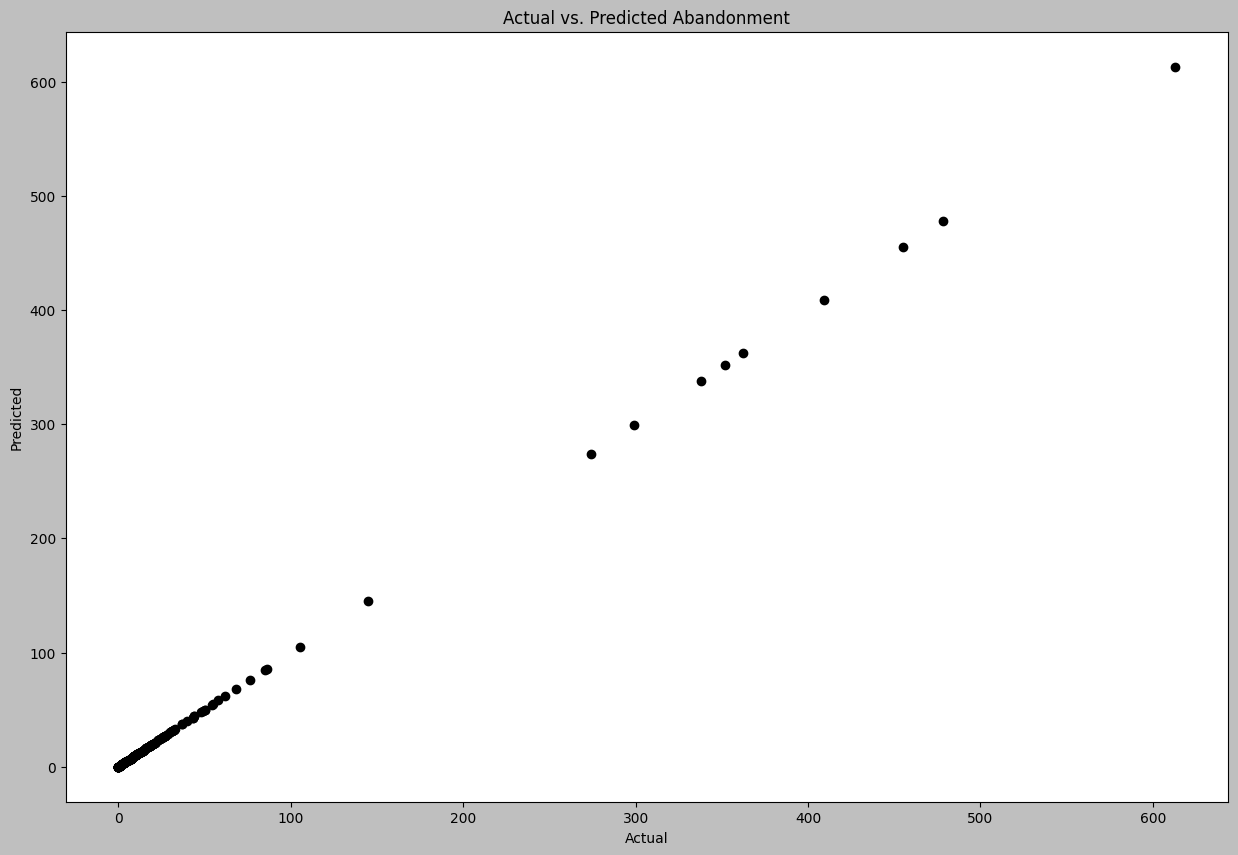

In [154]:
#Multiple Regression Analysis - Abandoned Calls
x1 = ccd_time.drop(['Abandoned Calls'],axis=1).values
y1 = ccd_time['Abandoned Calls'].values


x_train, x_test,y_train, y_test = tts(x1,y1, test_size=0.2,random_state=0)
model = lr()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
#print(y_pred)

#Testing Model Accuracy
pred2 = model.predict([[217,204,94.01,0.0,0.0,0.0,0.0,76.28]])
print(pred2)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print(accuracy)

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Abandonment')


Text(0, 0.5, 'Average Wait Time')

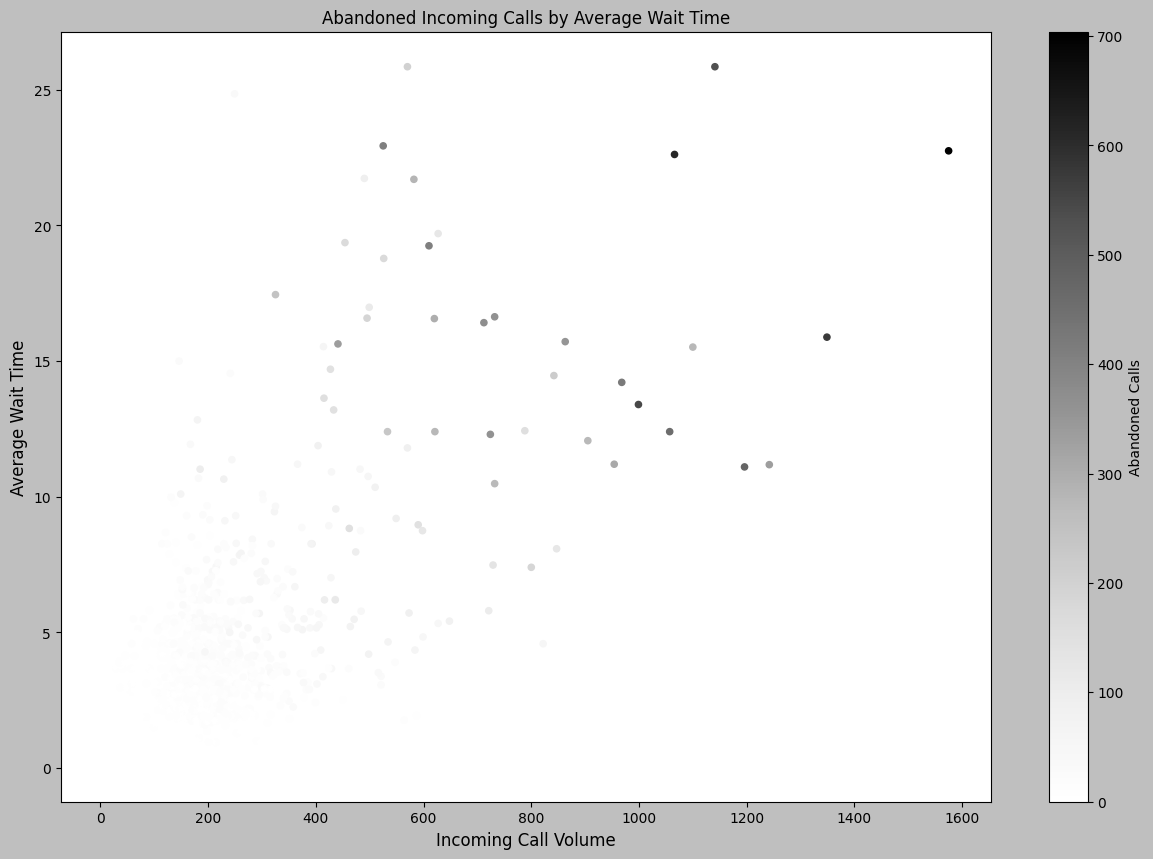

In [155]:
ccd_time.plot.scatter(x='Incoming Calls', y='Waiting Time (AVG)', c='Abandoned Calls', figsize=(15,10), title='Abandoned Incoming Calls by Average Wait Time', sharex=False)
plt.xlabel('Incoming Call Volume', size=12)
plt.ylabel('Average Wait Time', size=12)


Conversely, Service Level (SLA) and Average Speed of Answer (ASA) have an inverse relationship. The below chart illustrates that as call volume increases, SLA decreases and ASA goes up. In conjunction with the above graph, this clearly illustrates how these interact with high abandnment.



<Axes: title={'center': 'SLA, ASA, and Abandoned Calls'}, xlabel='Service Level (20 Seconds)', ylabel='Answer Speed (AVG)'>

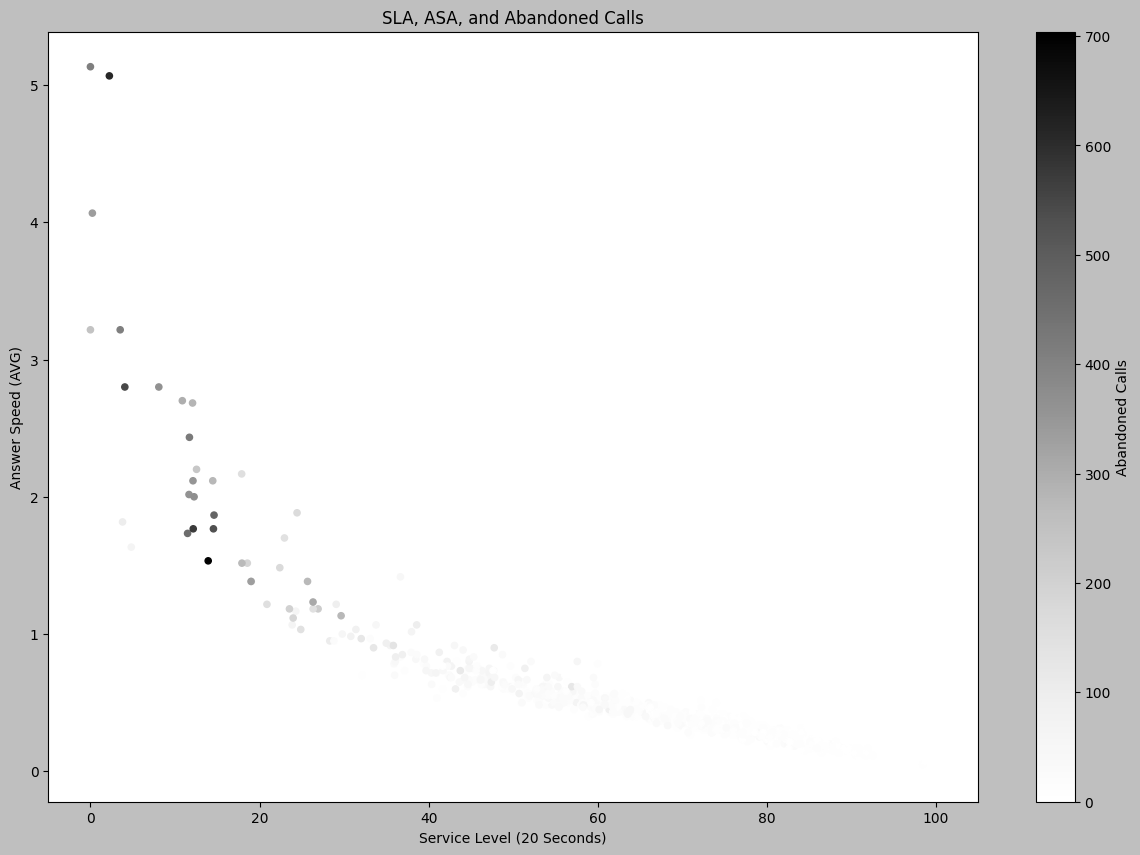

In [156]:
ccd_time.plot.scatter(x='Service Level (20 Seconds)', y='Answer Speed (AVG)', c='Abandoned Calls', figsize=(15,10), sharex=False,
                     title='SLA, ASA, and Abandoned Calls')


Fortunately, the vast majority of incoming calls are above 60% SLA. At a 60% SLA, the average call is answered in less than 1 minute. Combining the data from the below and above graphs, this means virtually no calls are being abandoned at a 60% SLA, although ancillary impacts (i.e. customer experience) may be impacted although the call is not abandoned.

Limitations of this dataset prevent a complete analysis of the impact of staffing and relationships with abandonment, volume, etc. But based on findings, next steps would be to dig further (with an expanded data set) to determine root cause of calls falling beneath the 60% threshold, and determining acceptable business KPI's for this metric (SLA) to balance customer experience, staffing, and cost.



Text(0.5, 1.0, 'Contacts By SLA')

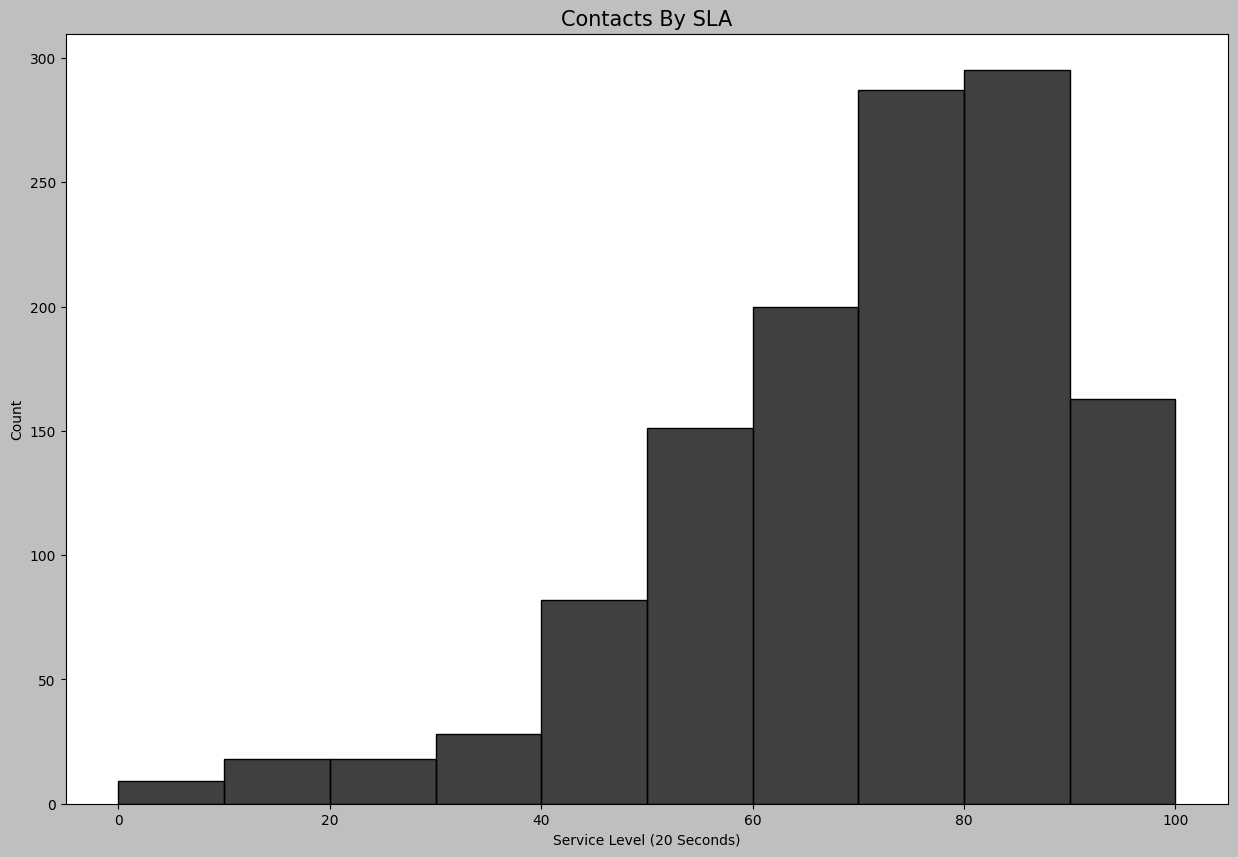

In [157]:
plt.figure(figsize=(15,10))
sns.histplot(ccd_time, x='Service Level (20 Seconds)', bins=10)
plt.title('Contacts By SLA', size=15)


In [158]:
# Calculate call center statistics
average_wait_time = sum(call_queue.items) / len(call_queue.items)
print(f'Average wait time for calls: {average_wait_time:.2f} minutes')

Average wait time for calls: 0.00 minutes
